##### About this notebook:

In [248]:
#-----------------------------------------------------------------------------------------------------------------------------
# Author:             Erick Rico Esparza
# Dates:              Sep 5 - 11, 2025
# Description:        This notebook explores preliminary datasets from HK and Mexico City, aiming to prepare the Week 1 presentation.
#-----------------------------------------------------------------------------------------------------------------------------

# Week 1

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
pd.options.display.float_format = '{:,.2f}'.format

### Hong Kong

In [251]:
df_pollutants_hk = pd.read_csv('hk_air_cb_tm_202401.csv', skiprows=11, on_bad_lines='skip')
df_aqhi_hk = pd.read_csv('hk_aqhi_202401 - copia.csv', on_bad_lines='skip')

#### HK Pollutants

##### Initial Inspection

In [252]:
print(df_pollutants_hk.shape)
print(df_pollutants_hk.head())
print(df_pollutants_hk.tail())
print(df_pollutants_hk.info())
print(df_pollutants_hk.columns)
df_pollutants_hk.describe()

(1488, 7)
       DATE  HOUR       STATION   NO2 RSP   O3 FSP
0  1/1/2024     1  CAUSEWAY BAY    50  57   95  39
1  1/1/2024     2  CAUSEWAY BAY    37  55  104  35
2  1/1/2024     3  CAUSEWAY BAY    28  55  112  36
3  1/1/2024     4  CAUSEWAY BAY    28  61  112  40
4  1/1/2024     5  CAUSEWAY BAY  N.A.  60  121  39
           DATE  HOUR  STATION NO2 RSP  O3 FSP
1483  31/1/2024    20  TAP MUN   9  28  96  11
1484  31/1/2024    21  TAP MUN   7  20  67   9
1485  31/1/2024    22  TAP MUN   6  16  52   9
1486  31/1/2024    23  TAP MUN   8  19  83  10
1487  31/1/2024    24  TAP MUN   7  18  91   8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     1488 non-null   object
 1   HOUR     1488 non-null   int64 
 2   STATION  1488 non-null   object
 3   NO2      1488 non-null   object
 4   RSP      1488 non-null   object
 5   O3       1488 non-null   object


,HOUR
count,"1,488.00"
mean,12.50
std,6.92
min,1.00
25%,6.75
50%,12.50
75%,18.25
max,24.00


##### Cleaning

In [253]:
df_pollutants_hk_clean = df_pollutants_hk.copy()

# Convert 'DATE' to datetime with dayfirst=True
df_pollutants_hk_clean['DATE'] = pd.to_datetime(df_pollutants_hk_clean['DATE'], dayfirst=True, errors='coerce')

# Rename columns
df_pollutants_hk_clean = df_pollutants_hk_clean.rename(columns={
    'RSP': 'PM10', 
    'FSP': 'PM2.5'}
    )

# Convert columns to float64, coercing errors (e.g., "N.A." becomes NaN)
for col in ['NO2', 'PM10', 'O3', 'PM2.5']:
    df_pollutants_hk_clean[col] = pd.to_numeric(df_pollutants_hk_clean[col], errors='coerce').astype('float64')

# The 'Hour' column will remain as is (object)

In [254]:
df_pollutants_hk_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1488 non-null   datetime64[ns]
 1   HOUR     1488 non-null   int64         
 2   STATION  1488 non-null   object        
 3   NO2      1436 non-null   float64       
 4   PM10     1463 non-null   float64       
 5   O3       1447 non-null   float64       
 6   PM2.5    1463 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 81.5+ KB


In [255]:
df_pollutants_hk_clean.describe()

,DATE,HOUR,NO2,PM10,O3,PM2.5
count,1488,"1,488.00","1,436.00","1,463.00","1,447.00","1,463.00"
mean,2024-01-16 00:00:00,12.50,44.38,42.86,64.45,27.48
min,2024-01-01 00:00:00,1.00,3.00,2.00,7.00,2.00
25%,2024-01-08 00:00:00,6.75,11.00,28.00,33.00,18.00
50%,2024-01-16 00:00:00,12.50,24.00,40.00,56.00,26.00
75%,2024-01-24 00:00:00,18.25,77.00,56.00,88.00,36.00
max,2024-01-31 00:00:00,24.00,213.00,138.00,205.00,88.00
std,NaN,6.92,39.90,20.27,41.12,13.57


In [256]:
df_pollutants_hk_clean.isna().sum()

DATE        0
HOUR        0
STATION     0
NO2        52
PM10       25
O3         41
PM2.5      25
dtype: int64

In [257]:
df_pollutants_hk_clean.head(30)

,DATE,HOUR,STATION,NO2,PM10,O3,PM2.5
0,2024-01-01,1,CAUSEWAY BAY,50.00,57.00,95.00,39.00
1,2024-01-01,2,CAUSEWAY BAY,37.00,55.00,104.00,35.00
2,2024-01-01,3,CAUSEWAY BAY,28.00,55.00,112.00,36.00
3,2024-01-01,4,CAUSEWAY BAY,28.00,61.00,112.00,40.00
4,2024-01-01,5,CAUSEWAY BAY,NaN,60.00,121.00,39.00
5,2024-01-01,6,CAUSEWAY BAY,23.00,59.00,113.00,37.00
6,2024-01-01,7,CAUSEWAY BAY,34.00,60.00,102.00,40.00
7,2024-01-01,8,CAUSEWAY BAY,62.00,61.00,68.00,38.00
8,2024-01-01,9,CAUSEWAY BAY,93.00,64.00,45.00,40.00
9,2024-01-01,10,CAUSEWAY BAY,96.00,69.00,36.00,46.00


In [258]:
# Fill NaN of pollutants with daily average
for col in ['NO2', 'PM10', 'O3', 'PM2.5']:
    df_pollutants_hk_clean[col] = df_pollutants_hk_clean.groupby('DATE')[col].transform(
        lambda x: x.fillna(x.mean())
    )

In [259]:
df_pollutants_hk_clean.head(30)

,DATE,HOUR,STATION,NO2,PM10,O3,PM2.5
0,2024-01-01,1,CAUSEWAY BAY,50.00,57.00,95.00,39.00
1,2024-01-01,2,CAUSEWAY BAY,37.00,55.00,104.00,35.00
2,2024-01-01,3,CAUSEWAY BAY,28.00,55.00,112.00,36.00
3,2024-01-01,4,CAUSEWAY BAY,28.00,61.00,112.00,40.00
4,2024-01-01,5,CAUSEWAY BAY,41.38,60.00,121.00,39.00
5,2024-01-01,6,CAUSEWAY BAY,23.00,59.00,113.00,37.00
6,2024-01-01,7,CAUSEWAY BAY,34.00,60.00,102.00,40.00
7,2024-01-01,8,CAUSEWAY BAY,62.00,61.00,68.00,38.00
8,2024-01-01,9,CAUSEWAY BAY,93.00,64.00,45.00,40.00
9,2024-01-01,10,CAUSEWAY BAY,96.00,69.00,36.00,46.00


In [260]:
df_pollutants_hk_clean.isnull().sum()

DATE       0
HOUR       0
STATION    0
NO2        0
PM10       0
O3         0
PM2.5      0
dtype: int64

In [261]:
df_pollutants_hk_clean.to_csv('hk_pollutants_clean.csv', index=False)

In [286]:
df_pollutants_hk_clean.head()

,DATE,HOUR,STATION,NO2,PM10,O3,PM2.5
0,2024-01-01,1,CAUSEWAY BAY,50.00,57.00,95.00,39.00
1,2024-01-01,2,CAUSEWAY BAY,37.00,55.00,104.00,35.00
2,2024-01-01,3,CAUSEWAY BAY,28.00,55.00,112.00,36.00
3,2024-01-01,4,CAUSEWAY BAY,28.00,61.00,112.00,40.00
4,2024-01-01,5,CAUSEWAY BAY,41.38,60.00,121.00,39.00


#### HK AQHI

##### Initial Inspection

In [262]:
print(df_aqhi_hk.shape)
print(df_aqhi_hk.head())
print(df_aqhi_hk.tail())
print(df_aqhi_hk.info())
print(df_aqhi_hk.columns)
df_aqhi_hk.describe()

(744, 4)
         Date  Hour  Tap Mun  Causeway Bay
0  2024-01-01     1     5.00          5.00
1  2024-01-01     2     5.00          5.00
2  2024-01-01     3     5.00          5.00
3  2024-01-01     4     5.00          5.00
4  2024-01-01     5     5.00          5.00
           Date  Hour  Tap Mun  Causeway Bay
739  2024-01-31    20     4.00          4.00
740  2024-01-31    21     4.00          4.00
741  2024-01-31    22     3.00          4.00
742  2024-01-31    23     3.00          4.00
743  2024-01-31    24     3.00          4.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          744 non-null    object 
 1   Hour          744 non-null    int64  
 2   Tap Mun       744 non-null    float64
 3   Causeway Bay  744 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 23.4+ KB
None
Index(['Date', 'Hour', 'Tap Mun',

,Hour,Tap Mun,Causeway Bay
count,744.00,744.00,744.00
mean,12.50,3.70,4.35
std,6.93,1.34,1.09
min,1.00,2.00,2.00
25%,6.75,3.00,4.00
50%,12.50,3.00,4.00
75%,18.25,5.00,5.00
max,24.00,7.00,8.00


##### Cleaning

In [263]:
df_aqhi_hk_clean = df_aqhi_hk.copy()

In [264]:
# Convert Date to datetime
df_aqhi_hk_clean['Date'] = pd.to_datetime(df_aqhi_hk_clean['Date'])

In [265]:
df_aqhi_hk_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          744 non-null    datetime64[ns]
 1   Hour          744 non-null    int64         
 2   Tap Mun       744 non-null    float64       
 3   Causeway Bay  744 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 23.4 KB


In [266]:
df_aqhi_hk_clean.to_csv('hk_aqhi_clean.csv', index=False)

In [287]:
df_aqhi_hk_clean.head()

,Date,Hour,Tap Mun,Causeway Bay
0,2024-01-01,1,5.00,5.00
1,2024-01-01,2,5.00,5.00
2,2024-01-01,3,5.00,5.00
3,2024-01-01,4,5.00,5.00
4,2024-01-01,5,5.00,5.00


### Mexico City

In [267]:
df_pollutants_mc = pd.read_csv('mc_CAM_MER_PED_202401 - copia.csv', on_bad_lines='skip')
df_ias_mc = pd.read_csv('mc_IAS_2024.csv', skiprows=9, on_bad_lines='skip')

#### MC Pollutants

##### Initial Inspection

In [268]:
print(df_pollutants_mc.shape)
print(df_pollutants_mc.head())
print(df_pollutants_mc.tail())
print(df_pollutants_mc.info())
print(df_pollutants_mc.columns)
df_pollutants_mc.describe()

(2230, 7)
         DATE  HOUR    STATION   NO2   O3   PM10  PM2.5
0  2024-01-01  1.00  Camarones 41.00 5.00  67.00  46.00
1  2024-01-01  2.00  Camarones 41.00 1.00  84.00  66.00
2  2024-01-01  3.00  Camarones 39.00 1.00 112.00  91.00
3  2024-01-01  4.00  Camarones 37.00 2.00 126.00 104.00
4  2024-01-01  5.00  Camarones 35.00 2.00 167.00 142.00
            DATE  HOUR   STATION   NO2    O3  PM10  PM2.5
2225  2024-01-31 21.00  Pedregal   NaN   NaN   NaN    NaN
2226  2024-01-31 22.00  Pedregal 19.00 30.00 49.00  21.00
2227  2024-01-31 23.00  Pedregal 22.00 27.00 42.00  17.00
2228  2024-01-31 24.00  Pedregal 27.00 23.00 23.00   6.00
2229  \t\t\t\t\t   NaN       NaN   NaN   NaN   NaN    NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     2230 non-null   object 
 1   HOUR     2229 non-null   float64
 2   STATION  2229 non-null   object 
 3   NO2  

,HOUR,NO2,O3,PM10,PM2.5
count,"2,229.00","2,110.00","2,110.00","2,117.00","2,086.00"
mean,12.49,32.77,22.19,39.33,19.22
std,6.92,16.96,22.93,22.65,15.37
min,1.00,3.00,0.00,0.00,0.00
25%,6.00,21.00,3.00,24.00,9.00
50%,12.00,31.00,13.00,36.00,16.00
75%,18.00,42.00,35.00,50.00,25.00
max,24.00,136.00,117.00,192.00,160.00


##### Cleaning

In [269]:
df_pollutants_mc.isna().sum()

DATE         0
HOUR         1
STATION      1
NO2        120
O3         120
PM10       113
PM2.5      144
dtype: int64

In [270]:
df_pollutants_mc.tail()

,DATE,HOUR,STATION,NO2,O3,PM10,PM2.5
2225,2024-01-31,21.00,Pedregal,NaN,NaN,NaN,NaN
2226,2024-01-31,22.00,Pedregal,19.00,30.00,49.00,21.00
2227,2024-01-31,23.00,Pedregal,22.00,27.00,42.00,17.00
2228,2024-01-31,24.00,Pedregal,27.00,23.00,23.00,6.00
2229,\t\t\t\t\t,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
# Drop the last row
df_pollutants_mc_clean = df_pollutants_mc.drop(df_pollutants_mc.index[-1]).copy()

In [272]:
df_pollutants_mc_clean.tail()

,DATE,HOUR,STATION,NO2,O3,PM10,PM2.5
2224,2024-01-31,20.00,Pedregal,16.00,39.00,23.00,9.00
2225,2024-01-31,21.00,Pedregal,NaN,NaN,NaN,NaN
2226,2024-01-31,22.00,Pedregal,19.00,30.00,49.00,21.00
2227,2024-01-31,23.00,Pedregal,22.00,27.00,42.00,17.00
2228,2024-01-31,24.00,Pedregal,27.00,23.00,23.00,6.00


In [273]:
df_pollutants_mc_clean.isna().sum()

DATE         0
HOUR         0
STATION      0
NO2        119
O3         119
PM10       112
PM2.5      143
dtype: int64

In [274]:
df_pollutants_mc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     2229 non-null   object 
 1   HOUR     2229 non-null   float64
 2   STATION  2229 non-null   object 
 3   NO2      2110 non-null   float64
 4   O3       2110 non-null   float64
 5   PM10     2117 non-null   float64
 6   PM2.5    2086 non-null   float64
dtypes: float64(5), object(2)
memory usage: 122.0+ KB


In [275]:
# Convert 'DATE' to datetime
df_pollutants_mc_clean['DATE'] = pd.to_datetime(df_pollutants_mc_clean['DATE'])

df_pollutants_mc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     2229 non-null   datetime64[ns]
 1   HOUR     2229 non-null   float64       
 2   STATION  2229 non-null   object        
 3   NO2      2110 non-null   float64       
 4   O3       2110 non-null   float64       
 5   PM10     2117 non-null   float64       
 6   PM2.5    2086 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 122.0+ KB


In [276]:
# Fill NaN of contaminants with daily average
for col in ['NO2', 'O3', 'PM10', 'PM2.5']:
    if col in df_pollutants_mc_clean.columns:
        df_pollutants_mc_clean[col] = df_pollutants_mc_clean.groupby('DATE')[col].transform(lambda x: x.fillna(x.mean()))

# Verifying the result
print(df_pollutants_mc_clean.isna().sum())
print(df_pollutants_mc_clean.head())
df_pollutants_mc_clean.info()

DATE       0
HOUR       0
STATION    0
NO2        0
O3         0
PM10       0
PM2.5      0
dtype: int64
        DATE  HOUR    STATION   NO2   O3   PM10  PM2.5
0 2024-01-01  1.00  Camarones 41.00 5.00  67.00  46.00
1 2024-01-01  2.00  Camarones 41.00 1.00  84.00  66.00
2 2024-01-01  3.00  Camarones 39.00 1.00 112.00  91.00
3 2024-01-01  4.00  Camarones 37.00 2.00 126.00 104.00
4 2024-01-01  5.00  Camarones 35.00 2.00 167.00 142.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     2229 non-null   datetime64[ns]
 1   HOUR     2229 non-null   float64       
 2   STATION  2229 non-null   object        
 3   NO2      2229 non-null   float64       
 4   O3       2229 non-null   float64       
 5   PM10     2229 non-null   float64       
 6   PM2.5    2229 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory

In [277]:
df_pollutants_mc_clean.to_csv('mc_pollutants_clean.csv', index=False)

In [290]:
df_pollutants_mc_clean.head()

,DATE,HOUR,STATION,NO2,O3,PM10,PM2.5
0,2024-01-01,1.00,Camarones,41.00,5.00,67.00,46.00
1,2024-01-01,2.00,Camarones,41.00,1.00,84.00,66.00
2,2024-01-01,3.00,Camarones,39.00,1.00,112.00,91.00
3,2024-01-01,4.00,Camarones,37.00,2.00,126.00,104.00
4,2024-01-01,5.00,Camarones,35.00,2.00,167.00,142.00


#### MC Air and Health Index

##### Initial Inspection

In [278]:
print(df_ias_mc.shape)
print(df_ias_mc.head())
print(df_ias_mc.tail())
print(df_ias_mc.info())
print(df_ias_mc.columns)
df_ias_mc.describe()

(8776, 4)
        Fecha  Hora  Condicion  Parametros
0  2024-01-01     1   Muy Mala  pm25, pm10
1  2024-01-01     2  Ext. Mala        pm10
2  2024-01-01     3  Ext. Mala  pm25, pm10
3  2024-01-01     4  Ext. Mala  pm25, pm10
4  2024-01-01     5  Ext. Mala  pm25, pm10
           Fecha  Hora Condicion  Parametros
8771  2024-12-31    20      Mala        pm10
8772  2024-12-31    21      Mala        pm10
8773  2024-12-31    22      Mala        pm10
8774  2024-12-31    23      Mala  pm10, pm25
8775  2024-12-31    24      Mala  pm10, pm25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8776 entries, 0 to 8775
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fecha       8776 non-null   object
 1   Hora        8776 non-null   int64 
 2   Condicion   8776 non-null   object
 3   Parametros  8776 non-null   object
dtypes: int64(1), object(3)
memory usage: 274.4+ KB
None
Index(['Fecha', 'Hora', 'Condicion', 'Parametros'], dtype='

,Hora
count,"8,776.00"
mean,12.50
std,6.92
min,1.00
25%,7.00
50%,13.00
75%,18.25
max,24.00


##### Cleaning

In [279]:
df_ias_mc_clean = df_ias_mc.copy()

# Rename columns
df_ias_mc_clean = df_ias_mc_clean.rename(columns={
    'Fecha': 'DATE',
    'Hora': 'HOUR',
    'Condicion': 'CONDITION',
    'Parametros': 'PARAMETERS'
})

df_ias_mc_clean

,DATE,HOUR,CONDITION,PARAMETERS
0,2024-01-01,1,Muy Mala,"pm25, pm10"
1,2024-01-01,2,Ext. Mala,pm10
2,2024-01-01,3,Ext. Mala,"pm25, pm10"
3,2024-01-01,4,Ext. Mala,"pm25, pm10"
4,2024-01-01,5,Ext. Mala,"pm25, pm10"
...,...,...,...,...
8771,2024-12-31,20,Mala,pm10
8772,2024-12-31,21,Mala,pm10
8773,2024-12-31,22,Mala,pm10
8774,2024-12-31,23,Mala,"pm10, pm25"


In [282]:
# Ordinal mapping for 'CONDITION'
scale_map = {
    "Ext. Mala": 5,
    "Muy Mala": 4,
    "Mala": 3,
    "Aceptable": 2,
    "Buena": 1
}
df_ias_mc_clean['CONDITION_ORD'] = df_ias_mc_clean['CONDITION'].map(scale_map)

# Verifying the result
df_ias_mc_clean[['DATE', 'HOUR', 'CONDITION', 'CONDITION_ORD', 'PARAMETERS']].head()

,DATE,HOUR,CONDITION,CONDITION_ORD,PARAMETERS
0,2024-01-01,1,Muy Mala,4,"pm25, pm10"
1,2024-01-01,2,Ext. Mala,5,pm10
2,2024-01-01,3,Ext. Mala,5,"pm25, pm10"
3,2024-01-01,4,Ext. Mala,5,"pm25, pm10"
4,2024-01-01,5,Ext. Mala,5,"pm25, pm10"


In [284]:
# Convert column 'DATE' to datetime
df_ias_mc_clean['DATE'] = pd.to_datetime(df_ias_mc_clean['DATE'])

print(df_ias_mc_clean.info())
df_ias_mc_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8776 entries, 0 to 8775
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           8776 non-null   datetime64[ns]
 1   HOUR           8776 non-null   int64         
 2   CONDITION      8776 non-null   object        
 3   PARAMETERS     8776 non-null   object        
 4   CONDITION_ORD  8776 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 342.9+ KB
None


,DATE,HOUR,CONDITION,PARAMETERS,CONDITION_ORD
0,2024-01-01,1,Muy Mala,"pm25, pm10",4
1,2024-01-01,2,Ext. Mala,pm10,5
2,2024-01-01,3,Ext. Mala,"pm25, pm10",5
3,2024-01-01,4,Ext. Mala,"pm25, pm10",5
4,2024-01-01,5,Ext. Mala,"pm25, pm10",5


In [285]:
df_ias_mc_clean.to_csv('mc_ias_clean.csv', index=False)

In [289]:
df_ias_mc_clean.head()

,DATE,HOUR,CONDITION,PARAMETERS,CONDITION_ORD
0,2024-01-01,1,Muy Mala,"pm25, pm10",4
1,2024-01-01,2,Ext. Mala,pm10,5
2,2024-01-01,3,Ext. Mala,"pm25, pm10",5
3,2024-01-01,4,Ext. Mala,"pm25, pm10",5
4,2024-01-01,5,Ext. Mala,"pm25, pm10",5


### Comparative Analysis

#### Descriptive Statistics
Exploratory statistics for pollutants and health indices in both cities.

In [301]:
# --- Descriptive Statistics by Station ---

print("Hong Kong - Descriptive Statistics by Station:")
for station in df_pollutants_hk_clean['STATION'].unique():
    print(f"\nStation: {station}")
    display(df_pollutants_hk_clean[df_pollutants_hk_clean['STATION'] == station][['NO2', 'O3', 'PM10', 'PM2.5']].describe())

print("\nMexico City - Descriptive Statistics by Station:")
for station in df_pollutants_mc_clean['STATION'].unique():
    print(f"\nStation: {station}")
    display(df_pollutants_mc_clean[df_pollutants_mc_clean['STATION'] == station][['NO2', 'O3', 'PM10', 'PM2.5']].describe())

Hong Kong - Descriptive Statistics by Station:

Station: CAUSEWAY BAY


,NO2,O3,PM10,PM2.5
count,744.00,744.00,744.00,744.00
mean,75.52,43.35,52.23,33.82
std,32.77,27.20,19.66,13.56
min,14.00,7.00,4.00,3.00
25%,50.34,20.00,38.00,24.00
50%,75.00,38.00,49.00,33.00
75%,95.00,61.25,65.00,42.00
max,213.00,133.00,138.00,88.00



Station: TAP MUN


,NO2,O3,PM10,PM2.5
count,744.00,744.00,744.00,744.00
mean,13.14,85.11,33.18,20.86
std,7.61,41.34,15.64,9.86
min,3.00,13.00,2.00,2.00
25%,9.00,51.00,22.00,14.00
50%,11.00,73.44,30.00,20.00
75%,15.00,116.00,42.00,27.00
max,71.51,205.00,80.00,54.00



Mexico City - Descriptive Statistics by Station:

Station: Camarones


,NO2,O3,PM10,PM2.5
count,743.00,743.00,743.00,743.00
mean,34.56,19.33,45.08,20.98
std,16.55,21.90,23.77,14.61
min,3.00,0.00,2.00,0.00
25%,24.00,2.00,28.60,11.88
50%,33.00,10.00,41.00,19.00
75%,43.00,31.00,56.00,27.00
max,136.00,108.00,167.00,142.00



Station: Merced


,NO2,O3,PM10,PM2.5
count,743.00,743.00,743.00,743.00
mean,38.89,18.32,43.05,21.62
std,17.08,21.01,23.11,18.11
min,7.00,1.00,0.00,0.00
25%,28.00,3.00,29.00,12.00
50%,36.00,8.00,41.00,19.00
75%,47.00,28.50,52.00,27.00
max,126.00,112.00,192.00,160.00



Station: Pedregal


,NO2,O3,PM10,PM2.5
count,743.00,743.00,743.00,743.00
mean,25.13,29.07,29.90,14.49
std,12.92,22.56,15.77,10.17
min,3.00,3.00,3.00,0.00
25%,15.00,11.00,17.00,7.00
50%,25.00,23.00,28.00,12.00
75%,33.00,40.50,39.00,19.00
max,71.00,117.00,93.00,81.00


##### Station-wise Descriptive Summary
- **Hong Kong:**
    - *Causeway Bay* (urban): High NO₂ (mean: 75.5, max: 213), high PM10 (mean: 52.2, max: 138), high PM2.5 (mean: 33.8, max: 88), lower O₃ (mean: 43.4, max: 133).
    - *Tap Mun* (rural): Much lower NO₂ (mean: 13.1, max: 71.5), lower PM10 (mean: 33.2, max: 80), lower PM2.5 (mean: 20.9, max: 54), but much higher O₃ (mean: 85.1, max: 205).
    - **Interpretation:** The urban station (Causeway Bay) shows much higher levels of primary pollutants (NO₂, PM10, PM2.5), while the rural station (Tap Mun) has much higher ozone, a typical pattern due to less NO titration in cleaner areas.

- **Mexico City:**
    - *Camarones* (industrial): NO₂ (mean: 34.6, max: 136), O₃ (mean: 19.3, max: 108), PM10 (mean: 45.1, max: 167), PM2.5 (mean: 21.0, max: 142).
    - *Merced* (central urban): NO₂ (mean: 38.9, max: 126), O₃ (mean: 18.3, max: 112), PM10 (mean: 43.1, max: 192), PM2.5 (mean: 21.6, max: 160).
    - *Pedregal* (southern/green): NO₂ (mean: 25.1, max: 71), O₃ (mean: 29.1, max: 117), PM10 (mean: 29.9, max: 93), PM2.5 (mean: 14.5, max: 81).
    - **Interpretation:** Industrial/urban stations (Camarones, Merced) have higher NO₂ and particulate matter, while the greener southern station (Pedregal) has lower primary pollutants but higher ozone.

**Overall conclusion:**
- There is a clear spatial pattern: urban/industrial areas have higher NO₂ and particulate matter, while rural/greener areas have lower primary pollutants but higher ozone.
- This highlights the importance of station-wise analysis for targeted air quality management and policy.
- Regulatory limits and exceedances will be discussed in the next section.

#### Exceedances & Rolling Window Analysis
Calculation of rolling averages and counting of exceedances of regulatory limits for each key pollutant in both cities.

Hong Kong - Exceedances per station:

Station: CAUSEWAY BAY
PM10>75 (24h): 52
PM2.5>37.5 (24h): 306
NO2>120 (24h): 15
O3>160 (8h): 0

Station: TAP MUN
PM10>75 (24h): 0
PM2.5>37.5 (24h): 45
NO2>120 (24h): 0
O3>160 (8h): 17

Mexico City - Exceedances per station:

Station: Camarones
PM10>75 (24h): 22
PM2.5>45 (24h): 28
NO2>395 (1h): 0
O3>70 (8h): 4

Station: Merced
PM10>75 (24h): 29
PM2.5>45 (24h): 33
NO2>395 (1h): 0
O3>70 (8h): 4

Station: Pedregal
PM10>75 (24h): 0
PM2.5>45 (24h): 17
NO2>395 (1h): 0
O3>70 (8h): 16


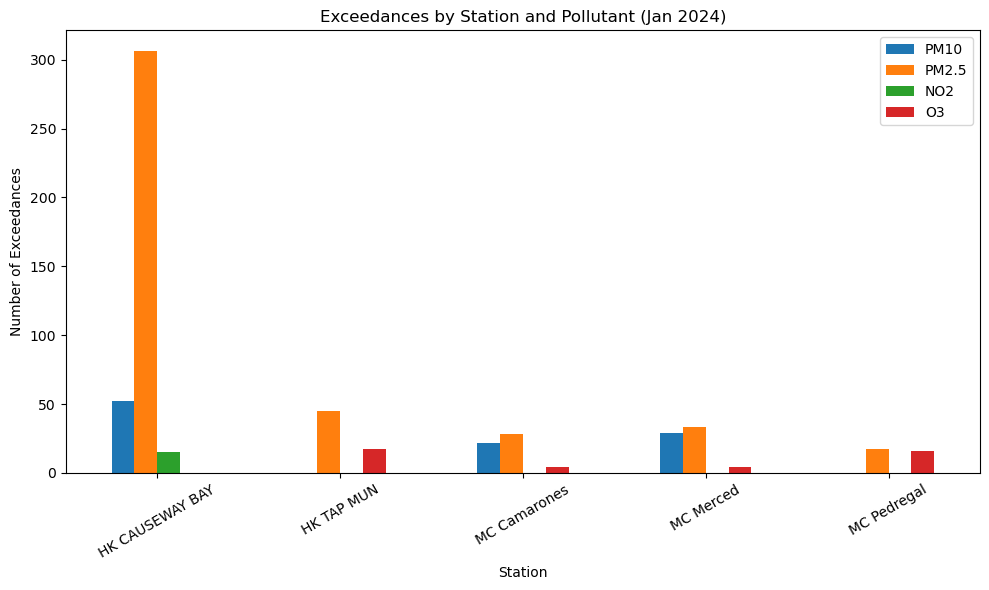

In [311]:
# --- Exceedances & Rolling Window Analysis by Station ---

exceedance_results = []

print("Hong Kong - Exceedances per station:")
for station in df_pollutants_hk_clean['STATION'].unique():
    df = df_pollutants_hk_clean[df_pollutants_hk_clean['STATION'] == station].copy()
    df['PM10_24h_mean'] = df['PM10'].rolling(window=24, min_periods=1).mean()
    df['PM2.5_24h_mean'] = df['PM2.5'].rolling(window=24, min_periods=1).mean()
    df['NO2_24h_mean'] = df['NO2'].rolling(window=24, min_periods=1).mean()
    df['O3_8h_mean'] = df['O3'].rolling(window=8, min_periods=1).mean()
    pm10_exc = (df['PM10_24h_mean'] > 75).sum()
    pm25_exc = (df['PM2.5_24h_mean'] > 37.5).sum()
    no2_exc = (df['NO2_24h_mean'] > 120).sum()
    o3_exc = (df['O3_8h_mean'] > 160).sum()
    print(f"\nStation: {station}")
    print(f"PM10>75 (24h): {pm10_exc}")
    print(f"PM2.5>37.5 (24h): {pm25_exc}")
    print(f"NO2>120 (24h): {no2_exc}")
    print(f"O3>160 (8h): {o3_exc}")
    exceedance_results.append({
        'Station': f'HK {station}',
        'PM10': pm10_exc,
        'PM2.5': pm25_exc,
        'NO2': no2_exc,
        'O3': o3_exc
    })

print("\nMexico City - Exceedances per station:")
for station in df_pollutants_mc_clean['STATION'].unique():
    df = df_pollutants_mc_clean[df_pollutants_mc_clean['STATION'] == station].copy()
    df['PM10_24h_mean'] = df['PM10'].rolling(window=24, min_periods=1).mean()
    df['PM2.5_24h_mean'] = df['PM2.5'].rolling(window=24, min_periods=1).mean()
    df['NO2_1h'] = df['NO2']  # 1-hour values for NO2
    df['O3_8h_mean'] = df['O3'].rolling(window=8, min_periods=1).mean()
    pm10_exc = (df['PM10_24h_mean'] > 75).sum()
    pm25_exc = (df['PM2.5_24h_mean'] > 45).sum()
    no2_exc = (df['NO2_1h'] > 395).sum()  # 395 µg/m³, 1-hour max
    o3_exc = (df['O3_8h_mean'] > 70).sum()
    print(f"\nStation: {station}")
    print(f"PM10>75 (24h): {pm10_exc}")
    print(f"PM2.5>45 (24h): {pm25_exc}")
    print(f"NO2>395 (1h): {no2_exc}")
    print(f"O3>70 (8h): {o3_exc}")
    exceedance_results.append({
        'Station': f'MC {station}',
        'PM10': pm10_exc,
        'PM2.5': pm25_exc,
        'NO2': no2_exc,
        'O3': o3_exc
    })

# Convert results to DataFrame for plotting
df_exceed = pd.DataFrame(exceedance_results).set_index('Station')

# Bar chart of exceedances by station and pollutant
df_exceed.plot(kind='bar', figsize=(10,6))
plt.ylabel('Number of Exceedances')
plt.title('Exceedances by Station and Pollutant (Jan 2024)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

##### Station-wise Exceedances Summary (with interpretation and regulatory context)

**Regulatory Limits**
- **Hong Kong:**
    - PM10: 75 µg/m³ (24h), max 9 exceedances/year
    - PM2.5: 37.5 µg/m³ (24h), max 18 exceedances/year
    - NO₂: 200 µg/m³ (1h), 120 µg/m³ (24h), max 18 (1h) and 9 (24h) exceedances/year
    - O₃: 160 µg/m³ (8h), max 9 exceedances/year
    - AQHI index: low (1-3), moderate (4-6), high (7), very high (8-10), serious (10+)
- **Mexico City:**
    - PM10: 75 µg/m³ (24h)
    - PM2.5: 45 µg/m³ (24h)
    - NO₂: 395 µg/m³ (1h), *no official 24h limit*
    - O₃: 0.095 ppm (1h max), 0.070 ppm (8h avg)
    - AQI index (ordinal mapping): "Ext. Mala"=5 (Extremely Bad), "Muy Mala"=4 (Very Bad), "Mala"=3 (Bad), "Aceptable"=2 (Acceptable), "Buena"=1 (Good)
    - *No official maximum number of exceedances per year found for Mexico City*

**Hong Kong**
- **CAUSEWAY BAY**
  - PM10 (>75 µg/m³, 24h): 52 exceedances (limit: 9)
  - PM2.5 (>37.5 µg/m³, 24h): 306 exceedances (limit: 18)
  - NO₂ (>120 µg/m³, 24h): 15 exceedances (limit: 9)
  - O₃ (>160 µg/m³, 8h): 0 exceedances (limit: 9)
  
  *Interpretation:*  
  Causeway Bay shows frequent exceedances for PM2.5 and PM10, far above the allowed annual limits, indicating persistent particulate pollution. NO₂ exceedances are also above the 24h limit. Ozone never exceeds the limit. This suggests that particulate matter is the main concern at this urban site, and regulatory compliance is not being met for particulates.

- **TAP MUN**
  - PM10: 0 exceedances (limit: 9)
  - PM2.5: 45 exceedances (limit: 18)
  - NO₂: 0 exceedances (limit: 9)
  - O₃: 17 exceedances (limit: 9)
  
  *Interpretation:*  
  Tap Mun, a more rural/remote site, has no PM10 or NO₂ exceedances, but some for PM2.5 and notably for ozone, both above the allowed annual limits. This pattern suggests regional ozone formation and some fine particulate pollution, but little local combustion or traffic impact.

**Mexico City**
- **Camarones**
  - PM10 (>75 µg/m³, 24h): 22 exceedances
  - PM2.5 (>45 µg/m³, 24h): 28 exceedances
  - NO₂ (>395 µg/m³, 1h): 0 exceedances
  - O₃ (>70 ppb, 8h): 4 exceedances

- **Merced**
  - PM10: 29 exceedances
  - PM2.5: 33 exceedances
  - NO₂: 0 exceedances
  - O₃: 4 exceedances

- **Pedregal**
  - PM10: 0 exceedances
  - PM2.5: 17 exceedances
  - NO₂: 0 exceedances
  - O₃: 16 exceedances

  *Interpretation:*  
  In Mexico City, Camarones and Merced (more industrial/urban/central) have frequent exceedances for both PM10 and PM2.5, but relatively few for ozone. Pedregal, a less urban with several green areas surrounding, has no PM10 exceedances, fewer for PM2.5, but the highest for ozone. There is no official maximum number of exceedances per year, but the number of days above the limit is still a concern for public health. For NO₂, the regulatory limit is 395 µg/m³ (1h), which is quite high; in the analyzed period, no hourly values exceeded this threshold at any station. This suggests that, at least for January 2024, NO₂ pollution in Mexico City did not reach the acute levels defined by the standard, though chronic exposure at lower levels may still be a concern.

**Conclusions:**
- Urban stations in both cities experience more frequent exceedances of particulate matter limits, reflecting local emissions from traffic and other sources.
- In Hong Kong, the number of exceedances at both stations is well above the regulatory allowance for several pollutants, indicating non-compliance and a need for stronger controls.
- Ozone exceedances are rare in central/urban sites but more common in rural or downwind stations, likely due to photochemical formation and transport.
- For NO₂ in Mexico City, the 1-hour standard is rarely exceeded, possibly due to the high threshold set by the regulation. However, this does not rule out health risks from chronic exposure at lower concentrations.
- These patterns highlight the need for targeted air quality management: reducing local emissions in urban centers and addressing regional ozone formation in outlying areas.

#### Time Series Plots
Visualize pollutant and index trends over time for each city.

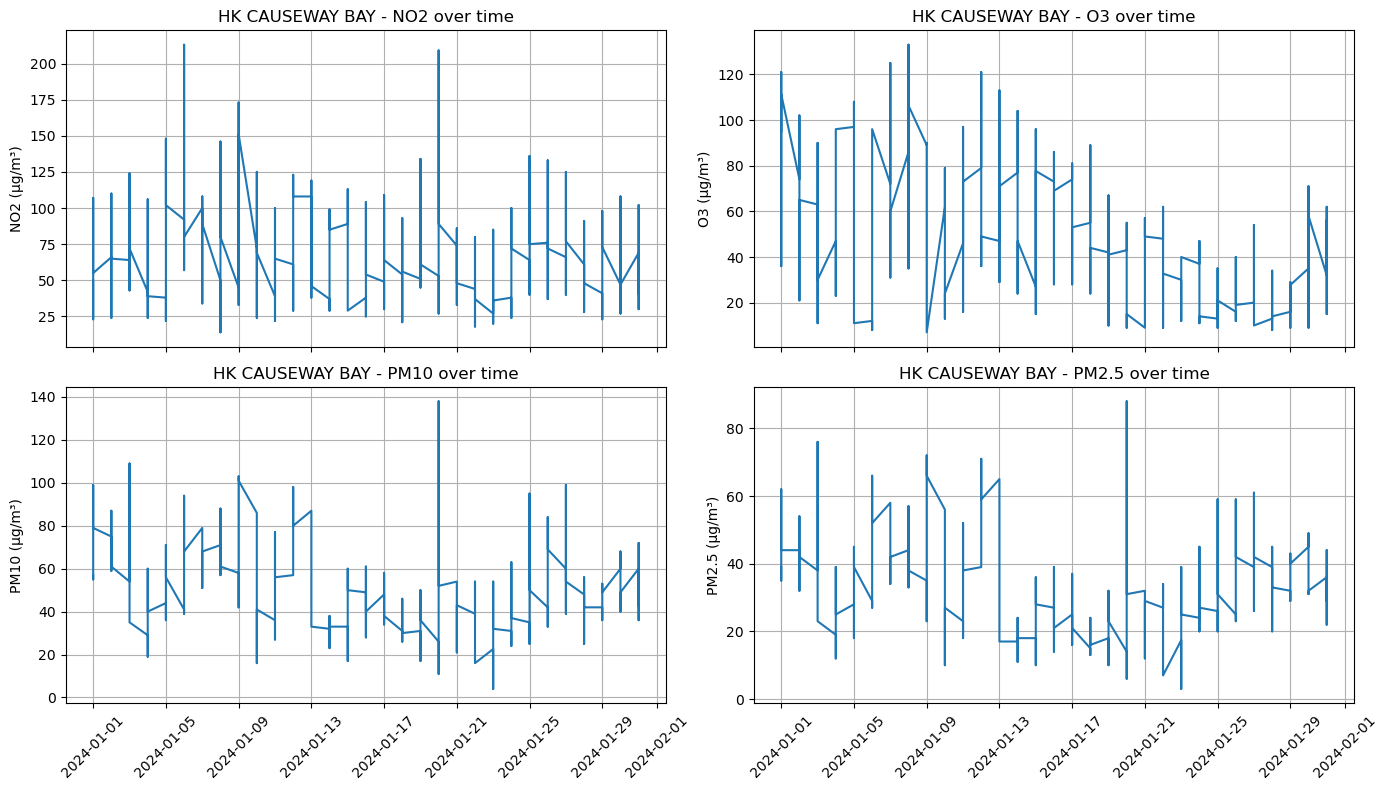

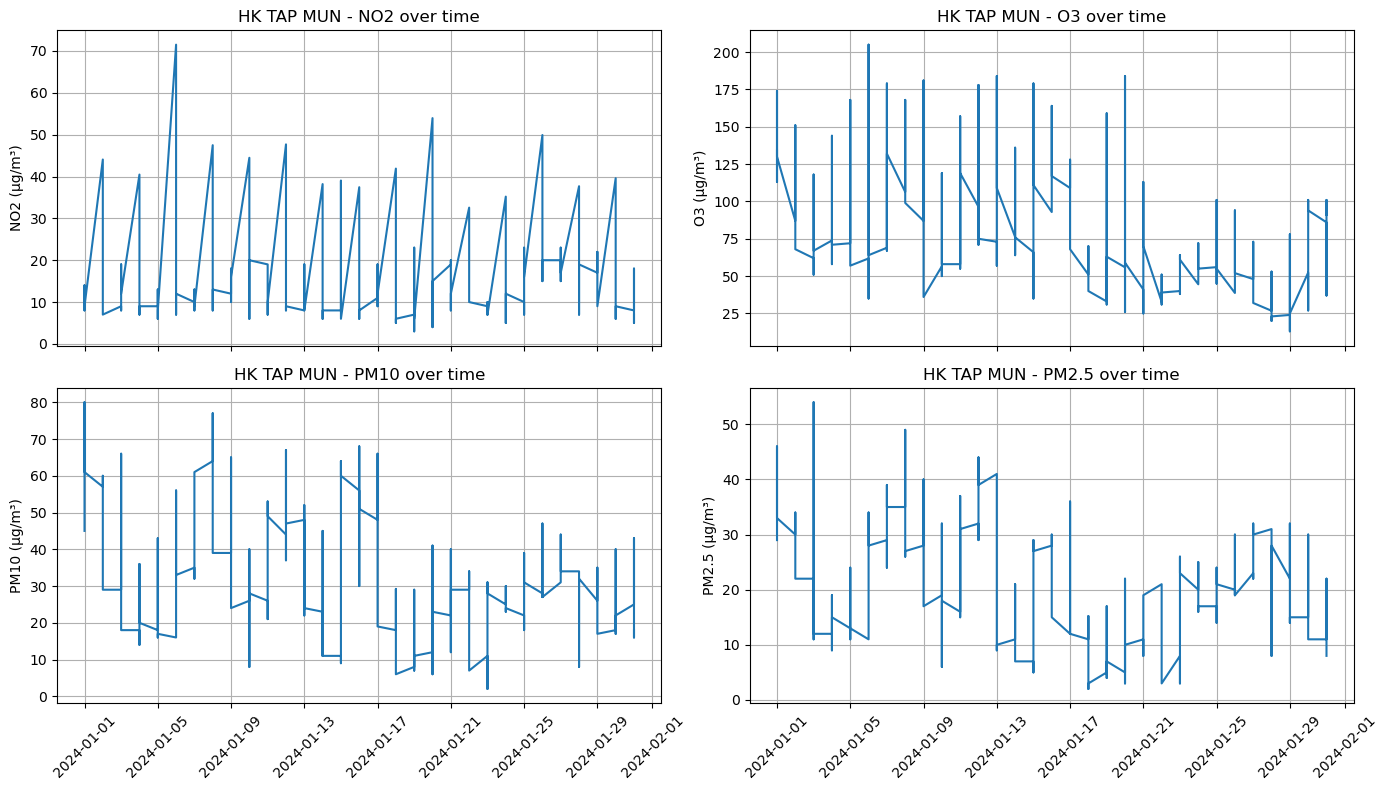

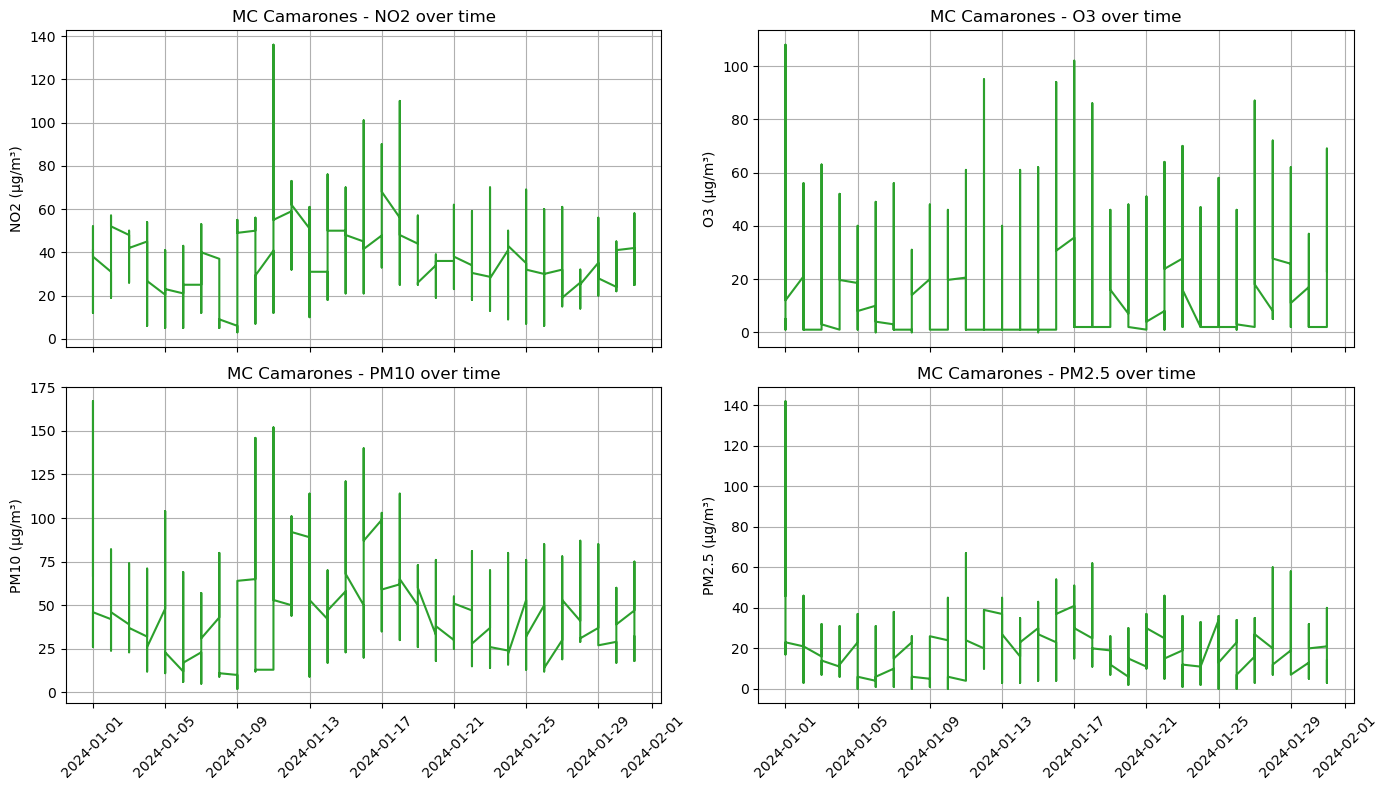

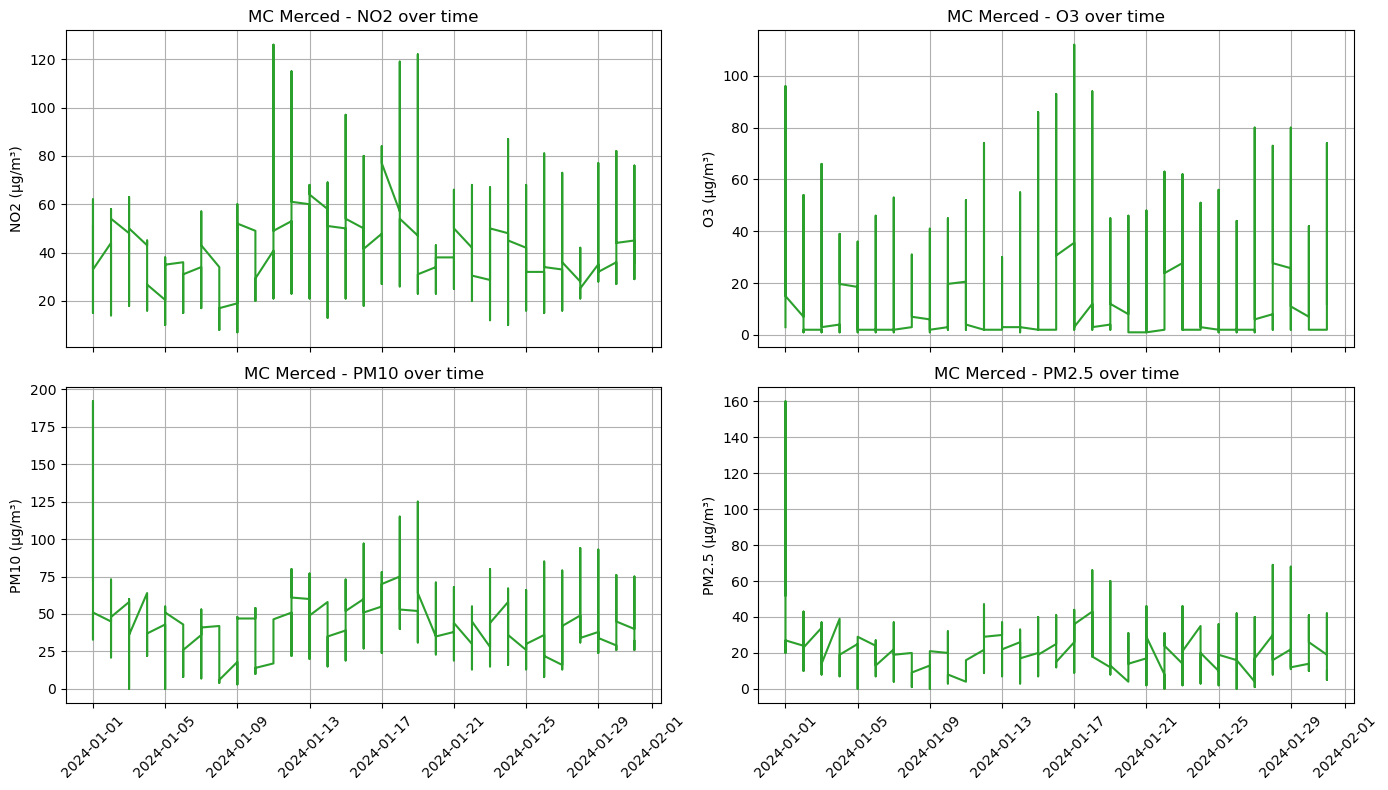

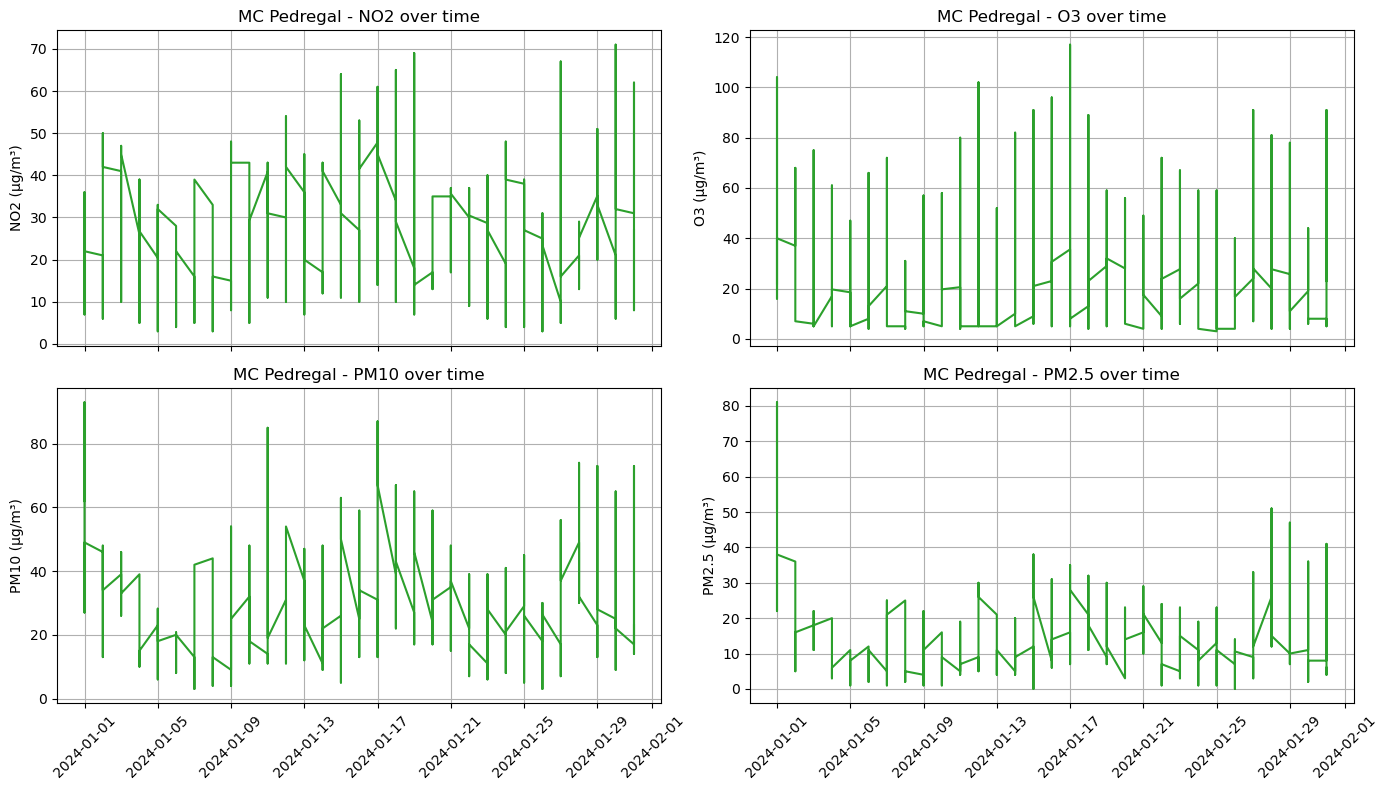

In [308]:
# --- Time Series Plots by Station ---

import matplotlib.dates as mdates

# Hong Kong
for station in df_pollutants_hk_clean['STATION'].unique():
    df = df_pollutants_hk_clean[df_pollutants_hk_clean['STATION'] == station]
    fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
    pollutants = ['NO2', 'O3', 'PM10', 'PM2.5']
    for i, pol in enumerate(pollutants):
        if pol in df.columns:
            axs[i//2, i%2].plot(df['DATE'], df[pol], label=pol, color='tab:blue')
            axs[i//2, i%2].set_title(f'HK {station} - {pol} over time')
            axs[i//2, i%2].set_ylabel(pol)
            axs[i//2, i%2].set_ylabel(f'{pol} (μg/m³)')
            axs[i//2, i%2].grid(True)
            axs[i//2, i%2].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

# Mexico City
for station in df_pollutants_mc_clean['STATION'].unique():
    df = df_pollutants_mc_clean[df_pollutants_mc_clean['STATION'] == station]
    fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
    for i, pol in enumerate(pollutants):
        if pol in df.columns:
            axs[i//2, i%2].plot(df['DATE'], df[pol], label=pol, color='tab:green')
            axs[i//2, i%2].set_title(f'MC {station} - {pol} over time')
            axs[i//2, i%2].set_ylabel(f'{pol} (μg/m³)')
            axs[i//2, i%2].grid(True)
            axs[i//2, i%2].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

#### Hong Kong Stations

**Causeway Bay**
- **NO₂:** Shows frequent and high peaks, with several days above 100 µg/m³ and even some reaching over 200 µg/m³. This indicates strong influence from traffic and urban emissions, with persistent high NO₂ levels.
- **O₃:** Moderate, with most values between 20–100 µg/m³ and some peaks above 120 µg/m³, mostly during the first half of the month. Ozone does not shows a light downward trend at some point, but levels are generally lower than in rural sites, likely due to titration by NO.
- **PM10 & PM2.5:** Both pollutants show high variability, with many days above 50 µg/m³ (PM10) and 30–60 µg/m³ (PM2.5), and some extreme peaks. This reflects frequent particulate pollution episodes, typical of dense urban areas. Also, the extreme peaks could show there was an important event on that specific day.

**Tap Mun**
- **NO₂:** Much lower than Causeway Bay, with most values below 40 µg/m³ and only occasional peaks. Indicates less direct impact from urban emissions.
- **O₃:** Consistently high and variable, with frequent peaks above 100 µg/m³ (during the first 2/3 of the month) and one day exceeding 200 µg/m³. This is typical for rural or downwind sites, where ozone can accumulate due to less NO titration.
- **PM10 & PM2.5:** Lower and less variable than in Causeway Bay, with most values below 60 µg/m³ (PM10) and 40 µg/m³ (PM2.5). Indicates cleaner air and less frequent particulate pollution.

**Conclusions:**
- The urban station (Causeway Bay) experiences frequent and intense peaks in NO₂ and particulates, reflecting strong local emissions.
- The rural station (Tap Mun) has much higher and more variable ozone, consistent with regional transport and photochemical formation, but lower primary pollutants.
- These patterns highlight the classic urban-rural contrast: higher primary pollutants in the city, higher ozone in cleaner, downwind areas.

#### Mexico City Stations
 
**Camarones**
- **NO₂:** Shows frequent peaks, with some days exceeding 100 µg/m³, but most values are between 10–60 µg/m³. This indicates episodic spikes, likely related to traffic or industrial activity.
- **O₃:** Generally low, with occasional peaks above 80–100 µg/m³. Ozone episodes are less frequent and do not show a clear upward or downward trend.
- **PM10 & PM2.5:** Both show high variability, with several days exceeding 100 µg/m³ (PM10) and 50 µg/m³ (PM2.5). There are clear episodes of high particulate pollution, possibly linked to New Year events or meteorological conditions.

**Merced**
- **NO₂:** Similar to Camarones, but with a bit more frequent peaks and a wide range. This indicates strong influence from urban sources.
- **O₃:** Low to moderate, with a few peaks. Also similar to Camarones trend.
- **PM10 & PM2.5:** Not so high variability, but with some extreme values (PM10 up to ~200 µg/m³, PM2.5 up to ~160 µg/m³) at the beggining of the month. Suggests episodic pollution events, possibly due to local sources or atmospheric conditions, or even related to some New Year's events.

**Pedregal**
- **NO₂:** Lower overall than the other stations, with most values below 50 µg/m³. Indicates less influence from direct emissions.
- **O₃:** Higher and seems more variable than in the other stations, with frequent peaks above 80–100 µg/m³. This is typical for downwind or greener areas, where ozone can accumulate.
- **PM10 & PM2.5:** Lower than in Camarones and Merced, with fewer and less intense peaks. Indicates cleaner air and less particulate pollution. Although there is also a clear peak on New Year.

**Conclusions:**
- Urban/industrial stations (Camarones, Merced) show more frequent and intense peaks in NO₂ and particulates, reflecting local emissions.
- Ozone is generally higher in Pedregal, consistent with regional transport and photochemical formation.
- All stations show episodic pollution events, but the type and intensity vary by location, highlighting the importance of spatial analysis for air quality management.

#### Comparison of Urban and Rural Areas: Hong Kong vs. Mexico City

Comparing urban stations in Hong Kong (Causeway Bay) and Mexico City (Merced, Camarones), both show elevated levels of primary pollutants such as NO₂ and particulate matter (PM10 and PM2.5), reflecting the direct influence of traffic, urban density, and local emission sources. In both cities, the peaks and frequency of pollution episodes are higher in these areas, implying similar health risks in dense urban contexts, although the magnitude and frequency may vary depending on regulations and local conditions.

On the other hand, rural or peripheral stations (Tap Mun in Hong Kong and Pedregal in Mexico City) consistently show lower concentrations of primary pollutants but higher levels of ozone (O₃). This pattern is typical and is due to the lower presence of NO in these areas, which allows ozone to accumulate. Thus, while the main concern in urban areas is exposure to NO₂ and particulate matter, in rural or green areas the risk is more associated with ozone episodes.

**In other words:**
- The urban areas of both cities share pollution problems from traffic and local sources, with high levels of NO₂ and particulate matter.
- Rural or peripheral areas have cleaner air in terms of primary pollutants, but a higher risk of ozone.
- These patterns highlight the importance of differentiated air quality management strategies depending on the type of area and its pollution sources.

> **Note on NO and ozone (O₃) titration:**

In air quality, "titration" refers to the chemical reaction where nitric oxide (NO), emitted primarily by traffic and urban sources, reacts with ozone (O₃) and destroys it:
NO + O₃ → NO₂ + O₂
This means that in urban areas with heavy traffic (where there is a lot of NO), ozone tends to be lower because NO eliminates it. Therefore, we see less ozone at urban stations, while in rural areas or areas far from traffic, where there is less NO, ozone can accumulate and reach higher levels.

**In summary:**
- In cities, NO "consumes" ozone, lowering its levels.
- In rural areas, there is less NO, so ozone is not destroyed and its levels are usually higher.

#### Correlation & Relationships
Explore relationships between pollutants and health indices.

Hong Kong - Correlations per station:

Station: CAUSEWAY BAY
        NO2    O3  PM10  PM2.5
NO2    1.00 -0.41  0.57   0.53
O3    -0.41  1.00  0.09   0.02
PM10   0.57  0.09  1.00   0.96
PM2.5  0.53  0.02  0.96   1.00


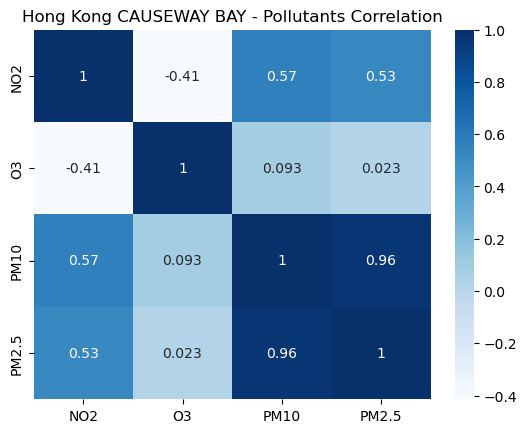


Station: TAP MUN
        NO2    O3  PM10  PM2.5
NO2    1.00 -0.21 -0.01   0.01
O3    -0.21  1.00  0.67   0.49
PM10  -0.01  0.67  1.00   0.89
PM2.5  0.01  0.49  0.89   1.00


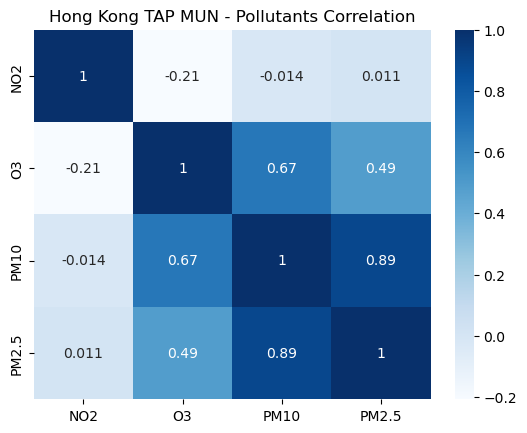


Mexico City - Correlations per station:

Station: Camarones
        NO2    O3  PM10  PM2.5
NO2    1.00 -0.37  0.57   0.37
O3    -0.37  1.00 -0.10   0.01
PM10   0.57 -0.10  1.00   0.84
PM2.5  0.37  0.01  0.84   1.00


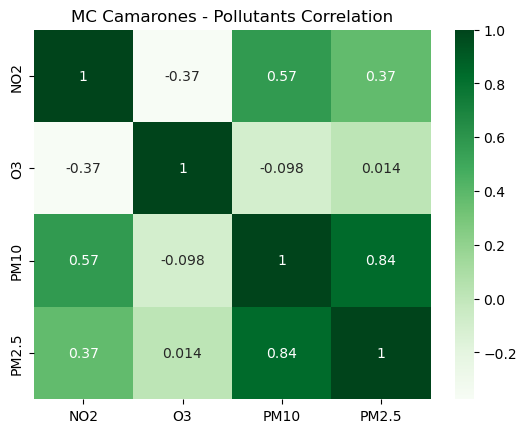


Station: Merced
        NO2    O3  PM10  PM2.5
NO2    1.00 -0.35  0.53   0.36
O3    -0.35  1.00 -0.04   0.03
PM10   0.53 -0.04  1.00   0.90
PM2.5  0.36  0.03  0.90   1.00


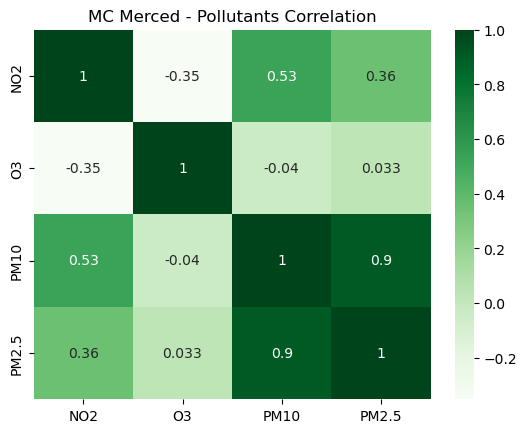


Station: Pedregal
        NO2    O3  PM10  PM2.5
NO2    1.00 -0.34  0.46   0.30
O3    -0.34  1.00  0.29   0.34
PM10   0.46  0.29  1.00   0.85
PM2.5  0.30  0.34  0.85   1.00


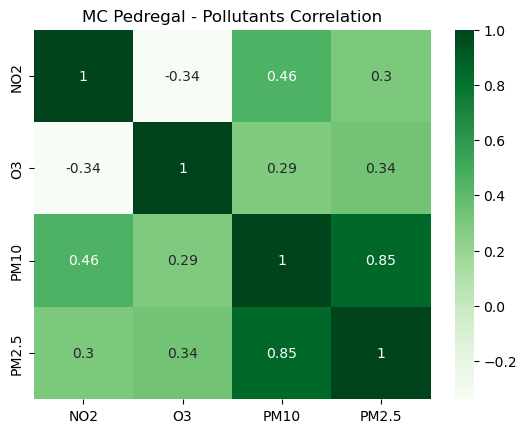

In [306]:
# --- Correlation & Relationships by Station ---

print("Hong Kong - Correlations per station:")
for station in df_pollutants_hk_clean['STATION'].unique():
    df = df_pollutants_hk_clean[df_pollutants_hk_clean['STATION'] == station]
    print(f"\nStation: {station}")
    corr = df[['NO2', 'O3', 'PM10', 'PM2.5']].corr()
    print(corr)
    sns.heatmap(corr, annot=True, cmap='Blues')
    plt.title(f'Hong Kong {station} - Pollutants Correlation')
    plt.show()

print("\nMexico City - Correlations per station:")
for station in df_pollutants_mc_clean['STATION'].unique():
    df = df_pollutants_mc_clean[df_pollutants_mc_clean['STATION'] == station]
    print(f"\nStation: {station}")
    corr = df[['NO2', 'O3', 'PM10', 'PM2.5']].corr()
    print(corr)
    sns.heatmap(corr, annot=True, cmap='Greens')
    plt.title(f'MC {station} - Pollutants Correlation')
    plt.show()

#### Interpretation of Pollutant Correlations: Hong Kong vs Mexico City

**Hong Kong**
- *Causeway Bay (urban):* Strong positive correlation between PM10 and PM2.5, indicating common sources (traffic, urban activities). NO₂ is also moderately correlated with both PM10 and PM2.5, reinforcing the idea of shared sources. There is a clear negative correlation between NO₂ and O₃, reflecting the titration effect: where NO₂ is high, ozone tends to be lower. Ozone shows little relationship with particulates.
- *Tap Mun (rural):* Strong correlation between PM10 and PM2.5, but much weaker between NO₂ and particulates. Ozone is positively correlated with PM10 and PM2.5, suggesting that ozone episodes often coincide with meteorological conditions that also favor particle presence. The negative correlation between NO₂ and O₃ is weaker than in the urban site.

**Mexico City**
- *Camarones & Merced (urban/industrial):* Strong correlation between PM10 and PM2.5, similar to Hong Kong, due to shared sources. NO₂ is moderately correlated with PM10 and less so with PM2.5. There is a clear negative correlation between NO₂ and O₃, again showing the titration effect. Ozone is not correlated with particulates.
- *Pedregal (peripheral/green):* Strong correlation between PM10 and PM2.5. Ozone shows moderate positive correlations with particulates, likely related to shared meteorological conditions or regional transport. The negative correlation between NO₂ and O₃ is present but weaker than in more urban stations.

**Comparative summary**
- Urban sites in both cities show strong relationships between particulates and a clear negative correlation between NO₂ and O₃, reflecting the influence of traffic and the titration effect.
- In rural or peripheral areas, the NO₂–O₃ relationship is weaker, and ozone is more associated with particulates, likely due to shared atmospheric conditions.
- The correlation patterns are very similar in both urban contexts, suggesting comparable processes of pollutant formation and dispersion in large cities, even if the magnitude and frequency differ.
- These findings highlight the need to control urban sources of NO₂ and particulates, and to consider ozone as a more relevant issue in less urbanized areas.

> **Note:**
The correlation between NO₂ and O₃ is usually negative in both urban and rural areas. In urban zones, this is strong due to titration (NO destroys O₃). In rural/green areas, the negative correlation is weaker or close to zero, but rarely positive, because NO₂ can still destroy O₃ if present. Ozone formation is complex and depends on sunlight and other precursors, so NO₂ and O₃ do not usually increase together.

#### Distribution Plots
Visualize the distribution of pollutant concentrations and indices.

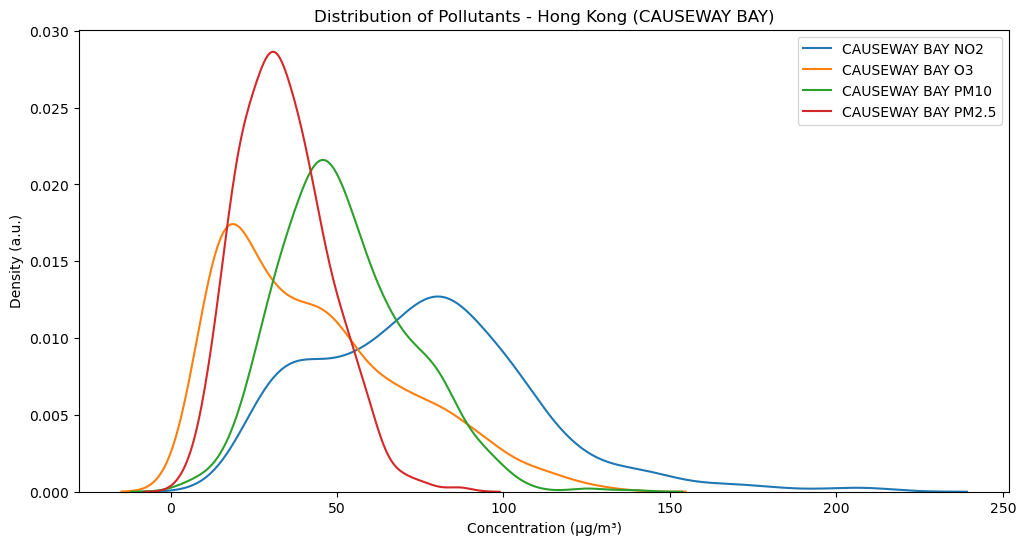

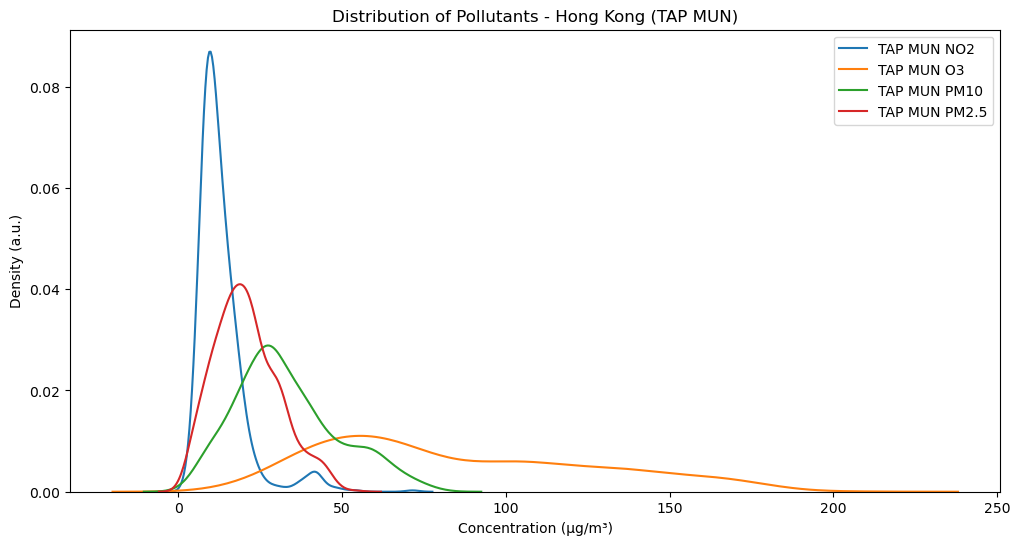

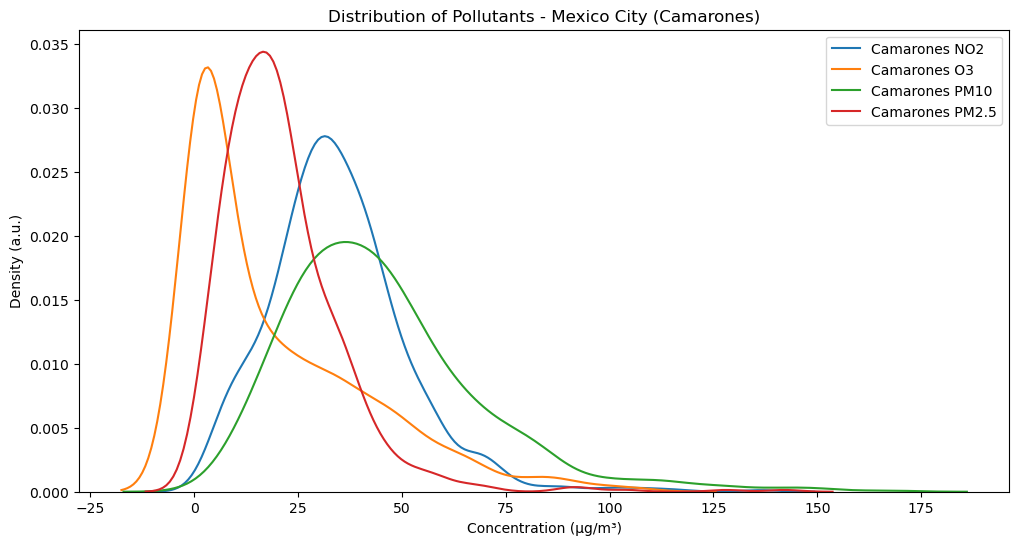

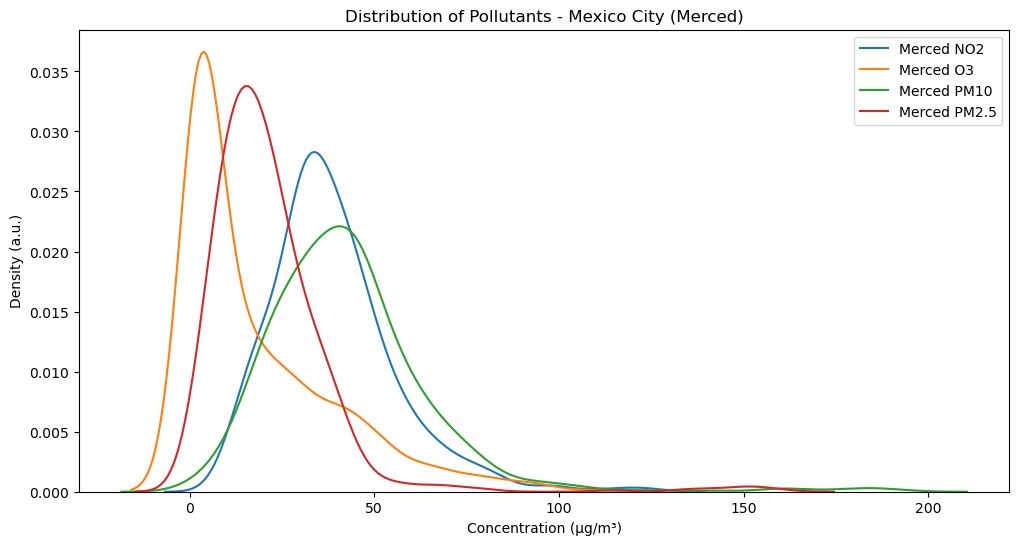

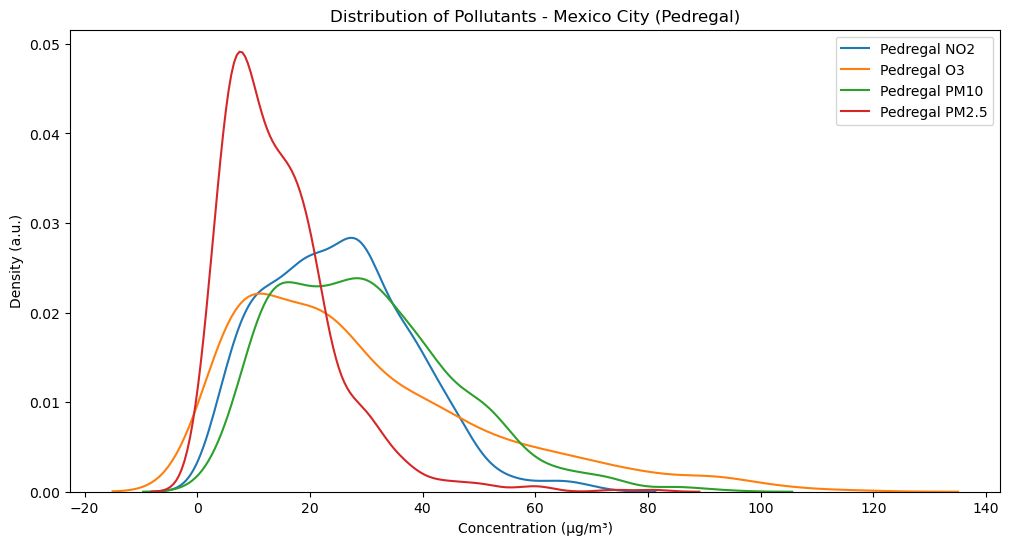

In [309]:
# --- Distribution Plots by Station ---

# Hong Kong
for station in df_pollutants_hk_clean['STATION'].unique():
    df = df_pollutants_hk_clean[df_pollutants_hk_clean['STATION'] == station]
    plt.figure(figsize=(12,6))
    for pol in ['NO2', 'O3', 'PM10', 'PM2.5']:
        if pol in df.columns:
            sns.kdeplot(df[pol].dropna(), label=f'{station} {pol}')
    plt.title(f'Distribution of Pollutants - Hong Kong ({station})')
    plt.xlabel('Concentration (μg/m³)')
    plt.ylabel('Density (a.u.)')
    plt.legend()
    plt.show()

# Mexico City
for station in df_pollutants_mc_clean['STATION'].unique():
    df = df_pollutants_mc_clean[df_pollutants_mc_clean['STATION'] == station]
    plt.figure(figsize=(12,6))
    for pol in ['NO2', 'O3', 'PM10', 'PM2.5']:
        if pol in df.columns:
            sns.kdeplot(df[pol].dropna(), label=f'{station} {pol}')
    plt.title(f'Distribution of Pollutants - Mexico City ({station})')
    plt.xlabel('Concentration (μg/m³)')
    plt.ylabel('Density (a.u.)')
    plt.legend()
    plt.show()

#### Interpretation of Distribution Plots: Hong Kong and Mexico City

**Hong Kong**
- **Causeway Bay (urban):**
  - PM2.5 (red) shows the narrowest and highest peak, indicating most values are concentrated at moderate concentrations, but with some high episodes.
  - PM10 (green) is also relatively narrow, peaking at slightly higher concentrations than PM2.5, and both have right-skewed tails, reflecting occasional pollution events.
  - NO₂ (blue) has a broader distribution, with a long tail toward high values, showing frequent moderate levels and some extreme peaks typical of urban traffic influence.
  - O₃ (orange) is the lowest and most left-shifted, with most values at low concentrations, consistent with urban titration effects.

- **Tap Mun (rural):**
  - NO₂ (blue), PM10 (green), and PM2.5 (red) all have narrow, left-shifted distributions, indicating consistently low concentrations and clean air.
  - O₃ (orange) is much broader and shifted to higher values, with a flatter distribution, reflecting frequent moderate to high ozone episodes typical of rural or downwind sites.

**Mexico City**
- **Camarones & Merced (urban/industrial):**
  - PM10 (green) have narrow, high peaks at moderate concentrations, but with PM2.5 showing a higher density at lower concentrations, both of which have right-skewed tails, indicating that most days are moderate but high pollution events do occur.
  - NO₂ (blue) is broader than PM2.5, with a long right tail, showing a wide range of values and some high peaks, typical of urban/industrial influence.
  - O₃ (orange) is the most left-shifted and narrow, with most values at low concentrations, similar to urban Hong Kong.

- **Pedregal (peripheral/green areas):**
  - PM2.5 (red) is narrow and left-shifted, indicating low and stable concentrations.
  - NO₂ (blue) and PM10 are wider but also left-shifted, reflecting less direct emissions, with a broader distribution of concentrations.
  - O₃ (orange) is also broader but with a not-so-flat right-skewed tail showing more frequent moderate to high ozone episodes.

**Comparative summary**
- In both cities, urban stations have narrow, high peaks for particulates (PM2.5, PM10) and broader, right-skewed distributions for NO₂, indicating frequent moderate values and occasional high episodes.
- Ozone (O₃) distributions are narrow and left-shifted in urban sites (low values), but broader and higher in rural/peripheral sites, reflecting the classic urban-rural ozone contrast.
- These patterns highlight that particulate pollution is a frequent urban issue, while ozone episodes are more relevant in less urbanized or downwind areas.

#### Key Insights & Next Steps

**Comparative findings:**
- Urban stations in both Hong Kong and Mexico City show frequent episodes of high NO₂ and particulate matter (PM10, PM2.5), with distributions that are narrow and peaked for particulates but broader for NO₂, reflecting the strong influence of traffic and local emissions.
- Ozone (O₃) levels are consistently low in urban areas due to titration by NO, but are much higher and more variable in rural or peripheral stations, highlighting the classic urban-rural ozone contrast.
- Correlation analysis confirms strong links between particulates and NO₂ in urban sites, and a negative relationship between NO₂ and O₃, which weakens in rural areas. Ozone episodes in rural/peripheral sites often coincide with meteorological conditions that also favor particle presence.
- The health risk indices (AQHI for Hong Kong, IAS for Mexico City) reflect these patterns: urban populations are more exposed to primary pollutants, while rural/peripheral populations face greater ozone risk.

**Policy and public awareness lessons:**
- Air quality management in both cities should prioritize reducing NO₂ and particulate emissions in urban centers, targeting traffic and industrial sources.
- Ozone management requires a regional approach, especially in downwind or less urbanized areas, and should be communicated as a health risk even outside city centers.
- Public awareness campaigns should be tailored: urban residents need to understand the risks of particulates and NO₂, while those in rural/peripheral areas should be informed about ozone episodes.
- Harmonizing and clearly communicating health indices (AQHI vs AQI) can help the public better understand and compare risks across cities.

**Next steps:**
- Investigate critical periods or pollution episodes in more detail, including meteorological influences and possible source events.
- Explore seasonality and weekly patterns to identify persistent trends or anomalies.
- Work towards harmonizing health indices for more direct comparisons and policy benchmarking.
- Review relevant literature to contextualize findings and support evidence-based recommendations for both cities.

---

**Research Question Reflection & Further Opportunities**

Original proposed research question was:

*"How do pollutant characteristics and their health risk indices (AQHI vs IAS) compare between Hong Kong and Mexico City, and what lessons can be drawn for improving public awareness and policy design in urban environments?"*

Based on the results and feedback, new opportunities arise to delve deeper and make the work more challenging and relevant:

### 1. Development of a Numerical Index for Mexico City (IAS)
- Create a numerical version of the IAS, inspired by Hong Kong's AQHI, to facilitate international comparisons and improve risk communication in Mexico.
- Analyze how this approach would change public perception and the usefulness of the index.
- Research proposal: *How can the Mexican IAS evolve into a numerical index and what benefits would this bring for air quality management and communication?*

### 2. Analysis of Critical Episodes and Meteorology
- Identify and characterize episodes of extreme pollution (peaks) in both cities.
- Analyze the meteorological conditions (wind, temperature, humidity) that accompany them and how they are managed in Hong Kong vs. Mexico City.
- Proposal: *What factors explain extreme events and how can they be anticipated or mitigated?*

### 3. Predictive Modeling and Machine Learning
- Apply simple machine learning models (regression, trees) to predict episodes of poor air quality in Mexico City and Hong Kong using meteorological and emissions variables.
- Compare the predictive capacity and the most important variables in each city.
- Proposal: *How can predictive analytics improve air quality management in Mexico City?*

### 4. Spatial Analysis: Urban vs. Rural/Peripheral
- Delve into the differences between urban and peripheral/rural stations.
- Identify patterns and propose differentiated management strategies.
- Proposal: *What differentiated policies can be implemented depending on the type of area?*

### 5. Public Policy and Communication Evaluation
- Analyze successful campaigns and policies in Hong Kong (restrictions, apps, alerts) and their possible adaptation to Mexico City.
- Propose a pilot campaign or communication tool for Mexico City.
- Proposal: *What communication and control strategies can be transferred from Hong Kong to Mexico City?*

### 6. Simulation of "what if" scenarios
- Simulate the impact of reducing certain emissions (fewer cars, more public transportation) on pollutant levels.
- Use Hong Kong data as a benchmark to propose realistic goals for Mexico City.
- Proposal: *What impact would different emissions reduction policies have on air quality in Mexico City?*